In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

## Ligação preferêncial

###  Distribuição de graus no modelo de Price

### Exemplo:

O seguinte script Python apresenta uma implementação do modelo de Price. 

O número de citações é uma variável aleatória com distribuição de Poisson e valor médio $lamb$. 

Qualquer distribuição com o mesmo valor esperado poderia ter sido usada. 

O exemplo faz analogia a uma rede de citação de artigos.

Para escolher os artigos que são citados, usa-se a função **Numpy.Random.Generator.choice** com o parâmetro **replace = False**, garantindo que não existam arestas múltiplas, isto é, que um artigo não
seja citado mais de uma vez pelo mesmo artigo.

In [3]:
rng = default_rng()

In [4]:
lamb = 3.5
p = 2
G1 = nx.DiGraph()
N = 100
G1.add_nodes_from(np.arange(0,N))
grauin = np.zeros(N)

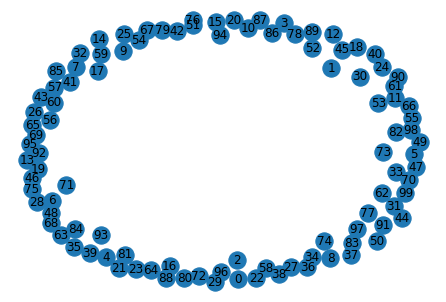

In [20]:
nx.draw(G1, with_labels=True)

In [6]:
L = rng.poisson(lam=lamb,size=N)

for i in range(1,N):
    pr = (grauin[0:i]+p)
    pr = pr/np.sum(pr)
    tam = np.min([i,L[i]])
    jj = rng.choice(i, tam, p=pr,replace=False)
    for j in jj:
        G1.add_edge(i,j)
        grauin[j] += 1

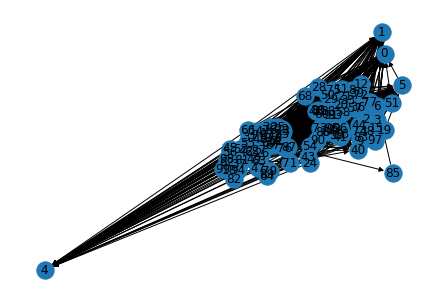

In [7]:
nx.draw(G1, with_labels=True)

### Modelo de Barabási-Albert

Barabási e Albert introduziram um modelo similar ao de Price. 

Porém, o grafo de Barabási e Albert é não direcionado. 

Cada novo vértice cria um número fixo m de arestas. 

A probabilidade de que um novo vértice $i$ crie uma ligação com o vértice $j$ é proporcional ao grau de $j$. 

Não são permitidas arestas múltiplas. 

Para iniciar a construção de uma rede de Barabási-Albert, é necessário ter uma rede inicial com a qual os novos nós irão se conectar. 

No Networkx, caso não seja fornecida uma rede inicial, a rede inicial padrão é um grafo estrela com $m+1$ nós.

### barabasi_albert_graph()

barabasi_albert_graph(n, m, seed=None, initial_graph=None)

Returns a random graph using Barabási–Albert preferential attachment

A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree.

Parameters:

n (int) - Number of nodes

m (int) - Number of edges to attach from a new node to existing nodes

seed (integer, random_state, or None (default)) - Indicator of random number generation state.

initial_graph (Graph or None (default)) - Initial network for Barabási–Albert algorithm. 
It should be a connected graph for most use cases. 
A copy of initial_graph is used. If None, starts from a star graph on (m+1) nodes.

In [8]:
# criação de uma rede com 1 milhão de vértices. 
# Cada vértice novo liga-se a 5 outros vértices
BAG = nx.barabasi_albert_graph(100,5)

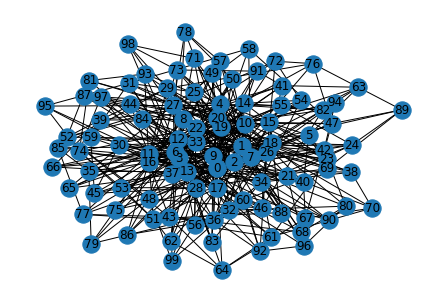

In [9]:
nx.draw(BAG, with_labels=True)